Finding tokens,types and TTR.

In [6]:
from nltk.tokenize import word_tokenize
from collections import Counter

f=open('tomsawyer.txt','r')
r=f.read()
r =r.lower()


m=0
tokenizelist=word_tokenize(r)

tokens=Counter(tokenizelist)
remove=[',','.',"''",'``','--','!','?',';',"'s"]
for i in remove:
	del tokens[i]

for i in tokens:
	m+=tokens[i]
    
print("Number of types:",len(tokens))
print("Number of tokens:",m)
print("TTR :",float(len(tokens))/m)


Number of types: 7488
Number of tokens: 72418
TTR : 0.10339970725510232


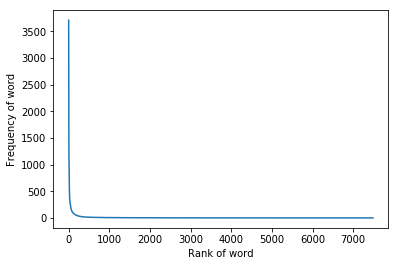

In [9]:
import matplotlib.pyplot as plt

frequency=sorted(tokens.values())[::-1]
rank=[i for i in range(1,len(tokens)+1)]

plt.plot(rank,frequency)
plt.xlabel('Rank of word')
plt.ylabel('Frequency of word')

plt.show()

Zipf's Law: plotting length vs frequency of the word.
All words with same length are couted towards one type.

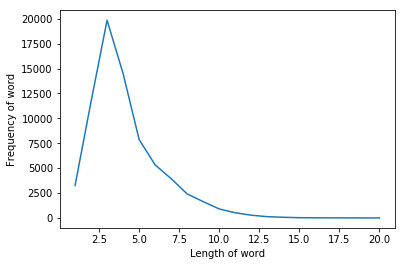

In [23]:
wordlen={} #dictionary with key=length and value=frequency for that length
for i in tokens:
    l=len(i)
    wordlen[l]=wordlen.get(l,0)+tokens[i]
    
length=sorted(wordlen)
frequency=[wordlen[i] for i in length]
#frequencyinv=[1/wordlen[i] for i in length]
#print(wordlen,length,frequency)

plt.plot(length,frequency)
plt.ylabel('Frequency of word')
plt.xlabel('Length of word')
plt.show()



Zipf's law for meaning vs frequency

In [ ]:
import random
for i in range(20):
    k=random.randint(1,len(rank)+1)
    

[1, 4, 5, 5, 5, 5, 8, 8, 8, 8, 9, 11, 22]


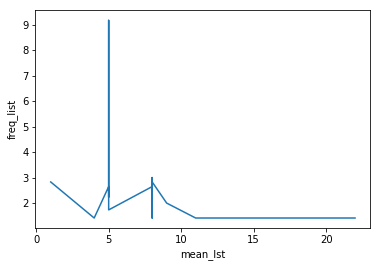

In [38]:
import math
words_lst=["spread",'petition','hunger','page','thought','gravity','drink','break','deck','thread','object','trick','prime',]
freq_list=[]
for i in words_lst:
    freq_list.append((tokens[i])**(1/2.0))
mean_lst=[1, 4, 5, 5, 5, 5, 8, 8, 8, 8, 9, 11, 22]


print(sorted(mean_lst))

    
plt.plot(mean_lst,freq_list)
plt.ylabel('freq_list')
plt.xlabel('mean_lst')
plt.show()

Heaps Law

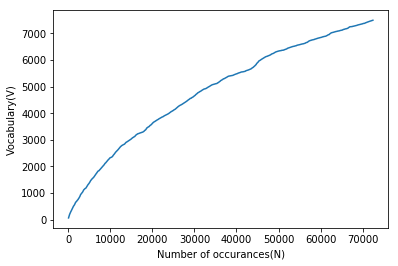

In [34]:
typ=[]
tok=[]
p=0
while(p<=len(tokenizelist)):
    p+=100
    k=0
    
    tokenizelist2=tokenizelist[0:p]  #counting types and tokens for 100, 200, 300 words and so on.
    tokens2=Counter(tokenizelist2)
    for i in remove:
        del tokens2[i]
    for i in tokens2:
        k+=tokens2[i]
    typ.append(len(tokens2))
    tok.append(k)

plt.plot(tok,typ)
plt.ylabel('Vocabulary(V)')
plt.xlabel('Number of occurances(N)')
plt.show()

Calculating Beta and k in V=k(N)^Beta

In [36]:
#source: https://lmfit.github.io/lmfit-py/model.html
from scipy.optimize import curve_fit
def heapslaw(x,k,beta):
    return k*(x**beta)
init=[60,0.5]
final, covar = curve_fit(heapslaw, tok,typ, p0=init)
#print(final)
print("k:",final[0])
print("Beta:",final[1])

k: 10.384740627393496
Beta: 0.5905057837879876
